# STEP 1: IMPORT LIBRARY

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import datetime
%matplotlib inline

In [2]:
# Read the dataset

df = pd.read_csv(r"C:\Users\Ogunsola\Desktop\DS_Analysis\feeds_all.csv")
df.head()

,ts,node 05: Corrente A,node 05: Corrente B,node 05: Corrente C,node 05: Potencia Ativa,node 05: Tensao A,node 05: Tensao B,node 05: Tensao C,node 06: Corrente A,node 06: Corrente B,...,node 11: Tensao A,node 11: Tensao B,node 11: Tensao C,node 12: Corrente A,node 12: Corrente B,node 12: Corrente C,node 12: Potencia Ativa,node 12: Tensao A,node 12: Tensao B,node 12: Tensao C
0,2019-05-23 09:00:00,51.14,43.48,46.38,25.92,233.53,234.11,233.22,92.33,82.29,...,231.93,232.03,231.23,67.90,69.68,71.79,40.51,232.00,232.08,231.17
1,2019-05-23 09:15:00,64.92,56.68,46.78,31.33,235.94,236.31,235.83,88.88,83.88,...,232.13,232.04,232.29,107.09,87.09,98.14,58.15,232.33,232.18,232.26
2,2019-05-23 09:30:00,77.24,67.99,73.34,43.26,232.79,233.49,232.81,99.09,101.91,...,231.70,231.79,231.74,103.17,95.61,99.12,59.31,231.51,231.83,231.63
3,2019-05-23 09:45:00,54.89,66.86,70.38,36.79,232.95,233.47,232.52,94.54,93.85,...,231.41,231.52,230.83,112.97,99.93,99.98,62.71,231.65,231.69,230.88
4,2019-05-23 10:00:00,49.06,62.38,55.68,32.74,232.39,232.90,232.23,70.56,68.04,...,230.41,230.41,230.41,103.18,94.77,101.41,59.16,230.73,230.66,230.34


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160608 entries, 0 to 160607
Data columns (total 57 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   ts                       160608 non-null  object 
 1   node 05: Corrente A      150066 non-null  float64
 2   node 05: Corrente B      150066 non-null  float64
 3   node 05: Corrente C      150066 non-null  float64
 4   node 05: Potencia Ativa  150066 non-null  float64
 5   node 05: Tensao A        150066 non-null  float64
 6   node 05: Tensao B        150066 non-null  float64
 7   node 05: Tensao C        150066 non-null  float64
 8   node 06: Corrente A      148446 non-null  float64
 9   node 06: Corrente B      148446 non-null  float64
 10  node 06: Corrente C      148446 non-null  float64
 11  node 06: Potencia Ativa  148446 non-null  float64
 12  node 06: Tensao A        148446 non-null  float64
 13  node 06: Tensao B        148446 non-null  float64
 14  node

In [4]:
df.describe()

,node 05: Corrente A,node 05: Corrente B,node 05: Corrente C,node 05: Potencia Ativa,node 05: Tensao A,node 05: Tensao B,node 05: Tensao C,node 06: Corrente A,node 06: Corrente B,node 06: Corrente C,...,node 11: Tensao A,node 11: Tensao B,node 11: Tensao C,node 12: Corrente A,node 12: Corrente B,node 12: Corrente C,node 12: Potencia Ativa,node 12: Tensao A,node 12: Tensao B,node 12: Tensao C
count,150066.000000,150066.000000,150066.000000,150066.000000,150066.000000,150066.000000,150066.000000,148446.000000,148446.000000,148446.000000,...,146089.000000,146089.000000,146089.000000,145952.000000,145952.000000,145952.000000,145952.000000,145952.000000,145952.000000,145952.000000
mean,14.521010,15.374244,13.917391,9.900794,235.556554,236.545822,234.780823,25.836282,27.341865,19.555707,...,234.908457,236.105669,234.049713,25.768867,28.584337,24.479274,17.426160,234.987681,236.117899,234.112684
std,9.806118,9.923192,7.530274,5.628978,21.153296,21.243704,21.085886,13.891966,19.324613,14.908152,...,15.706554,15.780844,15.644798,16.332398,12.727196,15.719725,9.613284,16.374084,16.446940,16.308658
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.520000,8.620000,8.750000,6.190000,236.160000,237.150000,235.380000,17.420000,14.440000,10.620000,...,234.630000,235.870000,233.810000,14.890000,22.050000,14.620000,11.970000,234.790000,235.970000,233.960000
50%,11.510000,12.870000,12.260000,8.320000,237.490000,238.510000,236.730000,22.160000,20.390000,13.310000,...,236.020000,237.240000,235.160000,19.730000,26.670000,18.620000,14.340000,236.190000,237.350000,235.320000
75%,18.470000,19.010000,17.180000,12.100000,238.720000,239.750000,237.950000,29.990000,32.410000,22.600000,...,237.290000,238.470000,236.380000,32.310000,32.820000,30.590000,20.870000,237.470000,238.580000,236.540000
max,103.970000,97.640000,107.630000,61.110000,244.970000,245.970000,245.060000,145.370000,189.470000,152.810000,...,243.450000,245.270000,243.980000,138.250000,129.140000,135.290000,78.450000,243.650000,245.810000,244.160000


# Working on a subset of the data

Using the Power's Law which relates power to both current and voltage i.e P = VxI.
Power is the product of voltage and current. So, I decide to work on Power to analyse the energy consumption in Node 05.

In [5]:
# Selection of a single node

df[['ts', 'node 05: Potencia Ativa']]

,ts,node 05: Potencia Ativa
0,2019-05-23 09:00:00,25.92
1,2019-05-23 09:15:00,31.33
2,2019-05-23 09:30:00,43.26
3,2019-05-23 09:45:00,36.79
4,2019-05-23 10:00:00,32.74
...,...,...
160603,2024-04-30 13:30:00,0.00
160604,2024-04-30 13:45:00,0.00
160605,2024-04-30 14:00:00,0.00
160606,2024-04-30 14:15:00,0.00


In [6]:
# Extract the columns of the new subset of the data

df_new = df[['ts', 'node 05: Potencia Ativa']]

In [7]:
# Define the file path where you want to save the CSV file for the new subset
 
file_path = r'C:\Users\Ogunsola\Desktop\DS_Analysis\df_new.csv'

In [8]:
# Save the extracted columns to the CSV file

df_new.to_csv(file_path, index=False)

In [9]:
# Reload and read the new subset dataset for only Node 05 Power

df = pd.read_csv(r"C:\Users\Ogunsola\Desktop\DS_Analysis\df_new.csv", parse_dates=['ts'])
df.head()

,ts,node 05: Potencia Ativa
0,2019-05-23 09:00:00,25.92
1,2019-05-23 09:15:00,31.33
2,2019-05-23 09:30:00,43.26
3,2019-05-23 09:45:00,36.79
4,2019-05-23 10:00:00,32.74


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160608 entries, 0 to 160607
Data columns (total 2 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   ts                       160608 non-null  datetime64[ns]
 1   node 05: Potencia Ativa  150066 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.5 MB


In [11]:
#printing shape of the new subset dataset

print("Shape of the data", df.shape)

Shape of the data (160608, 2)


In [12]:
#checking for any missing value(s) in the dataset

print("Number of Null values:- ")
df.isnull().sum()

Number of Null values:- 


ts                             0
node 05: Potencia Ativa    10542
dtype: int64

# Resampling and Data Visualization of the Energy data

In [13]:
# Aiming to input NAN values for the column

df['node 05: Potencia Ativa'].fillna(df['node 05: Potencia Ativa'].mean(), inplace = True)

# Mean is a measure of central tendency that represents the average of a set of values. 
#It is calculated by summing all the values in a dataset and then dividing by the number of values.

C:\Users\Ogunsola\AppData\Local\Temp\ipykernel_10000\37031266.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['node 05: Potencia Ativa'].fillna(df['node 05: Potencia Ativa'].mean(), inplace = True)


In [14]:
# Reconfiming the status of the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160608 entries, 0 to 160607
Data columns (total 2 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   ts                       160608 non-null  datetime64[ns]
 1   node 05: Potencia Ativa  160608 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.5 MB


In [15]:
# Setting the format for Time-Series 

df['ts'] = pd.to_datetime(df['ts'], format='%Y-%m-%d %H:%M:%S')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160608 entries, 0 to 160607
Data columns (total 2 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   ts                       160608 non-null  datetime64[ns]
 1   node 05: Potencia Ativa  160608 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.5 MB


In [16]:
# Extract the columns of the new subset of the data

df_new2 = df[['ts', 'node 05: Potencia Ativa']]

In [17]:
# Define the file path where you want to save the CSV file for the new subset
 
file_path = r'C:\Users\Ogunsola\Desktop\DS_Analysis\df_new2.csv'

In [18]:
# Save the extracted columns to the CSV file

df_new2.to_csv(file_path, index=False)

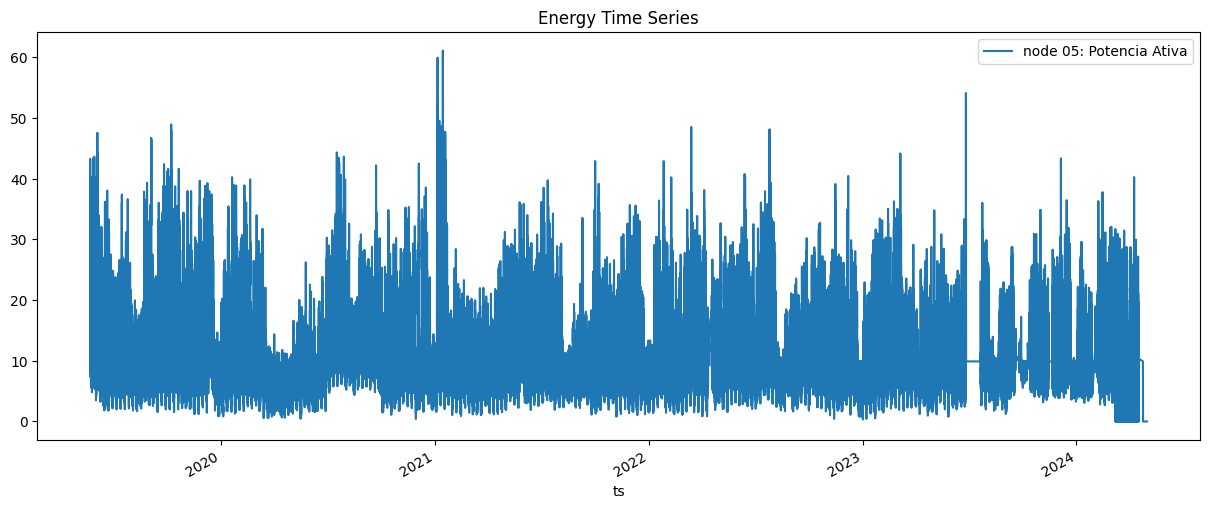

In [19]:
_ = df.plot(x='ts', y='node 05: Potencia Ativa', figsize=(15, 6), title='Energy Time Series')

In [20]:
# Setting index 
df = df.set_index('ts')
df.head()

,node 05: Potencia Ativa
ts,
2019-05-23 09:00:00,25.92
2019-05-23 09:15:00,31.33
2019-05-23 09:30:00,43.26
2019-05-23 09:45:00,36.79
2019-05-23 10:00:00,32.74


In [23]:
# Resampling to Hourly period

df_energy = pd.read_csv(r'C:\Users\Ogunsola\Desktop\DS_Analysis\df_new2.csv', parse_dates=True)
df_energy.ts = pd.to_datetime(df_energy.ts)

# use only data previous to "4/30/2024" 
query = df_energy.ts < "4/30/2024"
df_energy = df_energy[query]

# resamplie to hour consumptions instead of 15 minutes
df_energy.set_index('ts', inplace=True)
df_energy = df_energy.resample('H').mean()

# expand the date to its components (we can't feed the algorithms with dates/strings)
df_energy['hour'] = df_energy.index.hour
df_energy['day'] = df_energy.index.day
df_energy['day of week'] = df_energy.index.dayofweek
df_energy['month'] = df_energy.index.month

# Specify the file path to save the DataFrame
file_path = r'C:\Users\Ogunsola\Desktop\DS_Analysis\df_energy_processed.csv'

# Save the DataFrame to the specified file path
df_energy.to_csv(file_path, index=False)

df_energy.head()

C:\Users\Ogunsola\AppData\Local\Temp\ipykernel_10000\1692366229.py:10: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_energy = df_energy.resample('H').mean()


,node 05: Potencia Ativa,hour,day,day of week,month
ts,,,,,
2019-05-23 09:00:00,34.3250,9,23,3,5
2019-05-23 10:00:00,33.8600,10,23,3,5
2019-05-23 11:00:00,29.7275,11,23,3,5
2019-05-23 12:00:00,23.6925,12,23,3,5
2019-05-23 13:00:00,28.4625,13,23,3,5


C:\Users\Ogunsola\AppData\Local\Temp\ipykernel_10000\812351665.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.resample('M').mean() #Resampling for the period needed e.g Timeframe, Day, Week,Month etc.


,Monthly node 05: Potencia Ativa
ts,
2019-05-31,17.391765
2019-06-30,11.249031
2019-07-31,10.258017
2019-08-31,9.713741
2019-09-30,11.257448


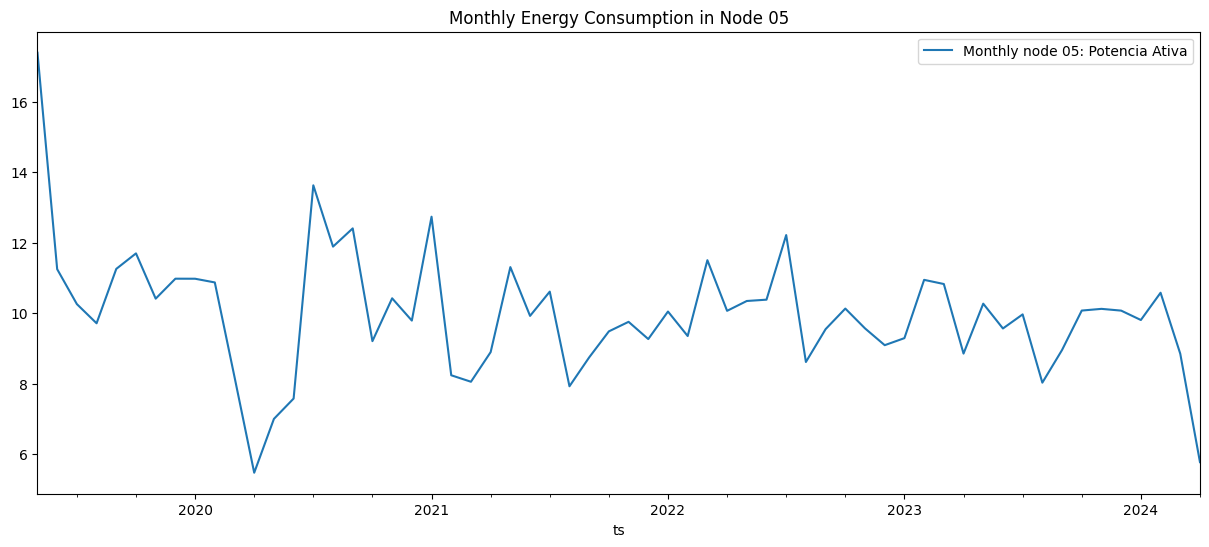

In [25]:
# Resampling to monthly frequency

df_monthly = df.resample('M').mean() #Resampling for the period needed e.g Timeframe, Day, Week,Month etc.
df_monthly.columns=['Monthly node 05: Potencia Ativa']

# plot the monthly mean energy consumption
df_monthly.plot(figsize=(15, 6), title='Monthly Energy Consumption in Node 05')

# print the first five rows of the data set
df_monthly.head()